# Stats and Politics 2

In [104]:
# Please run the imports below in order to set up the environment first.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [90]:
# Please run the code below to read in the following CSV data files. The CSV data files include the demographic and presidential voting data for years 2012 and 2016.

# Contains various census statistics for each county; these include things like the racial makeup of the population or the overall economic status.
demographic_df = pd.read_csv('data/S_P_II_clean_demographic_data.csv')

# Contains the number of votes for each major political party within each county for the 2012 elections.
votes2012_df = pd.read_csv('data/S_P_II_clean_presidential_2012_votes.csv')

# Contains the number of votes for each major political party within each county for the 2016 elections.
votes2016_df = pd.read_csv('data/S_P_II_clean_presidential_2016_votes.csv')

Now that we have imported the appropriate data science packages and read in all the necessary data files, we can begin with taking a peak and examining each data file using the following:

##### Demographic Data:

In [ ]:
# To get a peak at the Demographic dataset.
demographic_df.head()

In [ ]:
# To view the different columns and their datatypes within the Demographic dataset.
demographic_df.dtypes

In [ ]:
# To view just the amount of rows and columns found within the Demographic data frame.
demographic_df.shape

In [ ]:
# To get a concise summary of the Demographic data frame.
demographic_df.info()

I have reviewed the demographic dataframe using `.info()` and can confirm that in fact only 30% of the demogrpahic data is available. The data is read into the `demographic_df` dataframe from the `S_P_II_clean_demographic_data.csv` file. The dataframe is 3110 rows by 17 columns, where the only data that does appear to have remained intact is in fact the `state`, `county`, and `FIPS` columns with a total of 3110 entries(rows). The remaining 14 columns only have 933 entries(rows). The data is comprised of three different datatypes: fourteen `float64`, one `int64`, and two `objects`. The data file size is 413.2+ KB.

In [91]:
demographic_df.isna().sum()

state                                        0
county                                       0
FIPS                                         0
total_population                          2177
citizen_voting_age_population             2177
white_pct                                 2177
black_pct                                 2177
hispanic_pct                              2177
foreign_born_pct                          2177
female_pct                                2177
age_29_and_under_pct                      2177
age_65_and_older_pct                      2177
median_household_income                   2177
unemployed_pct_in_civilian_labor_force    2177
less_than_highschool_pct                  2177
less_than_college_pct                     2177
rural population_pct                      2177
dtype: int64

Using `.isna().sum()`, we can see that the 14 different columns within demographic dataframe which each have a total of 2177 missing values. As this data will not be necessary and we cannot utilize it in any beneficial way, the missing values will be removed from the dataframe using the `.dropna()` function.

In [92]:
# Removing any/all rows with missing values.
demographic_df = demographic_df.dropna()

# Check
demographic_df.isna().sum()

state                                     0
county                                    0
FIPS                                      0
total_population                          0
citizen_voting_age_population             0
white_pct                                 0
black_pct                                 0
hispanic_pct                              0
foreign_born_pct                          0
female_pct                                0
age_29_and_under_pct                      0
age_65_and_older_pct                      0
median_household_income                   0
unemployed_pct_in_civilian_labor_force    0
less_than_highschool_pct                  0
less_than_college_pct                     0
rural population_pct                      0
dtype: int64

##### Presidential 2012 Voter Data:

In [ ]:
# To get a peak at the Presidential 2012 voter data.
votes2012_df.head()

In [ ]:
# To view the different columns and their datatypes within the Presidential 2012 voter data.
votes2012_df.dtypes

In [ ]:
# To view just the amount of rows and columns found within the Presidential 2012 Votes data frame.
votes2012_df.shape

In [ ]:
# To get a concise summary of the Presidential 2012 Votes data frame.
votes2012_df.info()

In [ ]:
votes2012_df.isna().sum()

##### Presidential 2016 Voter Data:

In [ ]:
# To get a peak at the Presidential 2016 voter data.
votes2016_df.head()

In [ ]:
# To view the different columns and their datatypes within the Presidential 2016 voter data.
votes2016_df.dtypes

In [ ]:
# To view just the amount of rows and columns found within the Presidential 2016 Votes data frame.
votes2016_df.shape

In [ ]:
# To get a concise summary of the Presidential 2016 Votes data frame.
votes2016_df.info()

In [ ]:
votes2016_df.isna().sum()

Both Presidential 2012 Voter Data and Presidential 2016 Voter Data, which are the `S_P_II_clean_presidential_2012_votes.csv` and `S_P_II_clean_presidential_2016_votes.csv` files, have been read into `votes2012_df` and `votes2016_df` respectively. Both dataframes have 6308 rows by 9 columns and appear not to have any missing data. The data files are each comprised of three different datatypes: two `float64`, three `int64`, and four `objects`. The data files both have a size of 443.7+ KB.

---------------------

## Part 1 - Republican Vote Share Correlation

In order to begin our examination and gain a greater understanding of the correlation between the data, we must first establish what qualifies as a moderate and strong correlation. According to my research using the information found in the link below, I have found that:

- Values between **`0 and 0.3`** (0 and -0.3) indicate a **`weak`** positive (negative) linear relationship. 
- Values between **`0.3 and 0.7`** (-0.3 and -0.7) indicate a **`moderate`** positive (negative) linear relationship. 
- Values between **`0.7 and 1.0`** (-0.7 and -1.0) indicate a **`strong`** positive (negative) linear relationship via a firm linear rule.

link: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

Based on this information, we can use this to examine and categorize exactly what kind of relationship each of these data columns have. We can begin by removing any unnecessary data such as objects from the dataset and any other columns that we can identify as not having any type of impact on the relationship with any of the columns, such as the `year` column from our votes2012_df and votes2016_df dataframes.

In [5]:
# Selecting just the rows and columns with regards to Republicans
votes2012_df = votes2012_df.loc[votes2012_df['party'] == 'republican']

In [6]:
# Dropping the 'state' and 'county' columns for 2012 votes data.
votes2012_df = votes2012_df.drop(['state', 'county'], axis=1)

In [8]:
# Inner Joining the demographic data with the 2012 votes data.
demo_votes2012_merged = pd.merge(demographic_df, votes2012_df, on='FIPS')
demo_votes2012_merged

,state,county,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,...,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,year,candidate,party,candidatevotes,totalvotes,relative_votes
0,Alabama,Chambers,1017,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,...,7.489945,19.736732,87.515721,49.148034,2012,Mitt Romney,republican,7626.0,14611,52.603987
1,Alabama,Cherokee,1019,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,...,5.855731,18.717235,86.038301,85.736273,2012,Mitt Romney,republican,7506.0,9779,77.879228
2,Alabama,Clarke,1025,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,...,17.083333,18.957819,87.862766,75.980335,2012,Mitt Romney,republican,7470.0,13851,54.114749
3,Alabama,Clay,1027,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,...,6.591530,25.386407,88.937116,100.000000,2012,Mitt Romney,republican,4817.0,6662,73.051259
4,Alabama,Cleburne,1029,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,...,7.173601,25.815165,88.471927,100.000000,2012,Mitt Romney,republican,5272.0,6305,84.446580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Wyoming,Converse,56009,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,...,5.282284,9.758393,84.468152,55.360370,2012,Mitt Romney,republican,5043.0,6343,82.240705
929,Wyoming,Fremont,56013,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,...,7.344324,8.537172,77.648670,51.424370,2012,Mitt Romney,republican,11075.0,16939,67.497562
930,Wyoming,Park,56029,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,...,3.786077,5.748368,67.998625,44.240383,2012,Mitt Romney,republican,11234.0,14608,79.330556
931,Wyoming,Sublette,56035,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,...,2.786971,4.658830,75.645069,100.000000,2012,Mitt Romney,republican,3472.0,4376,81.906110


In [9]:
# To remove any/all columns with object datatypes.
demo_votes2012_corr = demo_votes2012_merged.select_dtypes(exclude=['object'])

# To drop the 'year' column as explained above.
demo_votes2012_corr = demo_votes2012_corr.drop(['year'], axis=1)
demo_votes2012_corr

,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,candidatevotes,totalvotes,relative_votes
0,1017,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034,7626.0,14611,52.603987
1,1019,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273,7506.0,9779,77.879228
2,1025,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335,7470.0,13851,54.114749
3,1027,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000,4817.0,6662,73.051259
4,1029,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000,5272.0,6305,84.446580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,56009,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370,5043.0,6343,82.240705
929,56013,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370,11075.0,16939,67.497562
930,56029,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383,11234.0,14608,79.330556
931,56035,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000,3472.0,4376,81.906110


Now that we have selected only the necessary data, we can now take a look at the correlation between each of the different columns by calculating the correlation using the `.corr()` function and using a heatmap with annotations to clearly display the correlation values of each column.

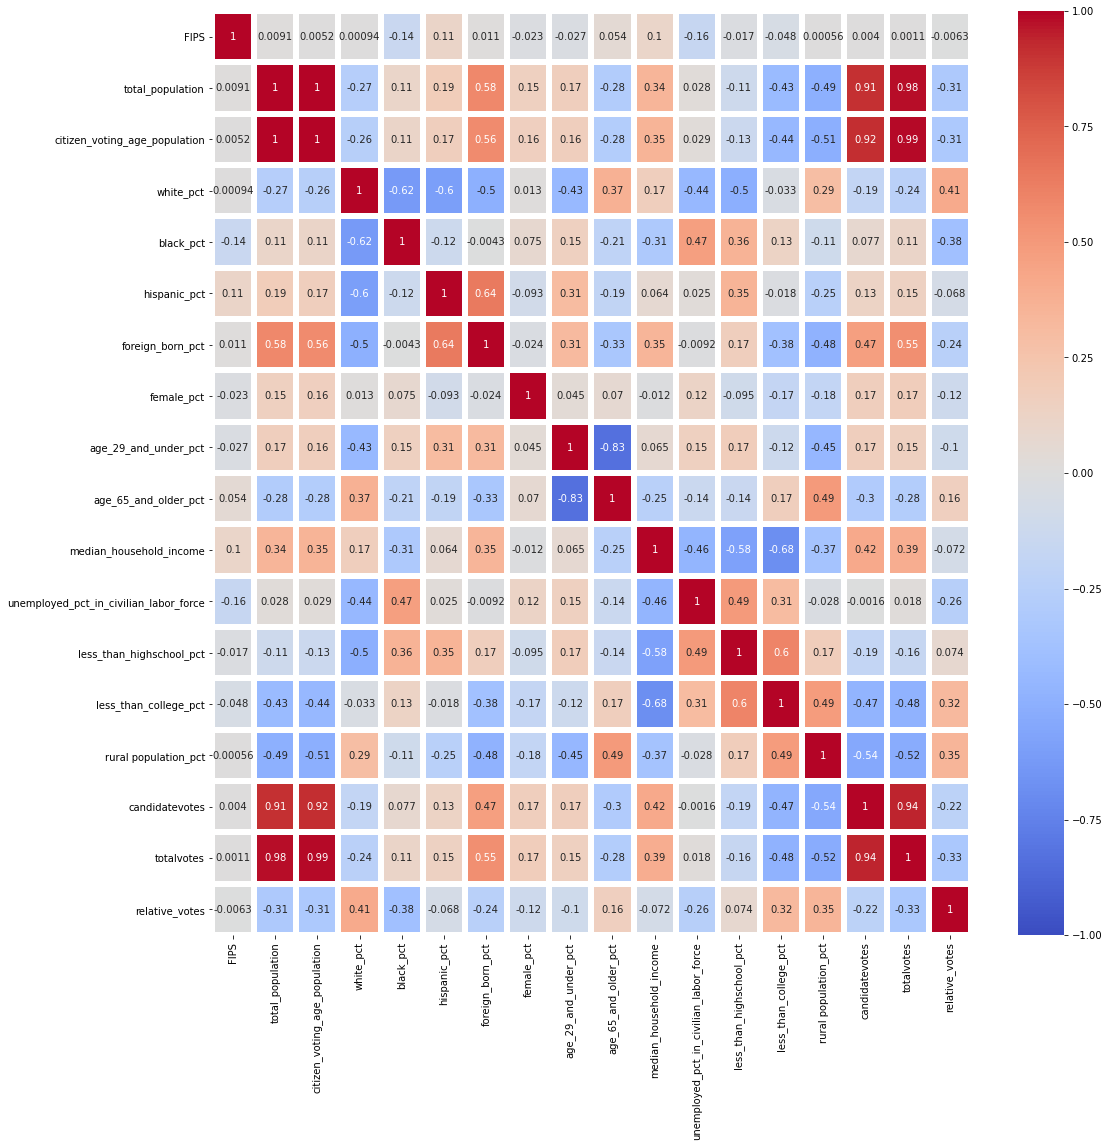

In [14]:
# To compute and take a look at the correlation between each of the columns.
corr = demo_votes2012_corr.corr()

# Creating and configuring the heatmap to visualize our data.
plt.figure(figsize=(17, 17))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, lw=5)
plt.show()

# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(111)
# cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)

# fig.colorbar(cax)
# ticks = np.arange(0,len(demo_votes2012_corr.columns),1)
# ax.set_xticks(ticks)
# plt.xticks(rotation=90)
# ax.set_yticks(ticks)
# ax.set_xticklabels(demo_votes2012_corr.columns)
# ax.set_yticklabels(demo_votes2012_corr.columns)
# plt.show()

Looking at the above 2012 heatmap we have created, we can clearly see exactly which data columns are moderately or strongly correlated with the Republican vote share. What this means is that in this case, we are looking at the correlation between either the `candidate_votes` column (which can be used to find correlations with like values as it is a whole number and not a percentage) and/or we can also look at the `relative_votes` column (which can be used to find correlations with like values as it is a percentage and not a whole number) and whether any of the other columns have a value between `0.3 and 0.7` indicating a `moderate positive correlation` or a value between `0.7 and 1.0` indicating a `strong positive correlation`. 

**NOTE:** Both of these columns represent the Republican Vote Share.

#### Positive Correlation

The following is a list of the columns which are `moderately` correlated with the Republican share vote:

**`candidate_votes`**
- foreign_born_pct
- median_household_income

**`relative_votes`**
- white_pct
- less_than_college_pct
- rural population_pct

The following is a list of the columns which are `strongly` correlated with the Republican share vote:

- **`candidate_votes`**
- total_population
- citizen_voting_age_population
- total_votes

#### Weak Positive or Negative Correlation

The following is a list of the columns which are **NOT** moderately or strongly correlated with the Republican share vote (or in other words have a weak positive or overall negative correlation):

**`candidate_votes`**
- white_pct
- black_pct
- hispanic_pct
- female_pct
- age_29_and_under_pct
- and_65_and_older_pct
- unemployment_pct_in_civilian_labor_force
- less_than_highschool_pct
- less_than_college_pct
- rural population_pct
- relative_votes

**`relative_votes`**
- total_population
- citizen_voting_age_population
- black_pct
- hispanic_pct
- foreign_born_pct
- female_pct
- age_29_and_under_pct
- and_65_and_older_pct
- median_household_income
- unemployment_pct_in_civilian_labor_force
- less_than_highschool_pct
- candidate_votes
- total_votes

We can do the same as above now with the `votes2016_df` dataframe:

In [16]:
# Selecting just the rows and columns with regards to Republicans.
votes2016_df = votes2016_df.loc[votes2016_df['party'] == 'republican']

In [17]:
# Dropping the 'state' and 'county' columns for 2016 votes data.
votes2016_df = votes2016_df.drop(['state', 'county'], axis=1)

In [19]:
# Inner Joining the demographic data with the 2016 votes data.
demo_votes2016_merged = pd.merge(demographic_df, votes2016_df, on='FIPS')
demo_votes2016_merged

,state,county,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,...,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,year,candidate,party,candidatevotes,totalvotes,relative_votes
0,Alabama,Chambers,1017,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,...,7.489945,19.736732,87.515721,49.148034,2016,Donald Trump,republican,7843.0,13900,57.554854
1,Alabama,Cherokee,1019,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,...,5.855731,18.717235,86.038301,85.736273,2016,Donald Trump,republican,8953.0,10733,85.266667
2,Alabama,Clarke,1025,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,...,17.083333,18.957819,87.862766,75.980335,2016,Donald Trump,republican,7140.0,13031,55.396074
3,Alabama,Clay,1027,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,...,6.591530,25.386407,88.937116,100.000000,2016,Donald Trump,republican,5245.0,6624,80.916384
4,Alabama,Cleburne,1029,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,...,7.173601,25.815165,88.471927,100.000000,2016,Donald Trump,republican,5764.0,6593,89.392060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Wyoming,Converse,56009,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,...,5.282284,9.758393,84.468152,55.360370,2016,Donald Trump,republican,5520.0,6654,89.204913
929,Wyoming,Fremont,56013,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,...,7.344324,8.537172,77.648670,51.424370,2016,Donald Trump,republican,11167.0,17023,72.668706
930,Wyoming,Park,56029,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,...,3.786077,5.748368,67.998625,44.240383,2016,Donald Trump,republican,11115.0,15095,81.428571
931,Wyoming,Sublette,56035,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,...,2.786971,4.658830,75.645069,100.000000,2016,Donald Trump,republican,3409.0,4390,84.110535


In [20]:
# To remove any/all columns with object datatypes.
demo_votes2016_corr = demo_votes2016_merged.select_dtypes(exclude=['object'])

# To drop the 'year' column as explained above.
demo_votes2016_corr = demo_votes2016_corr.drop(['year'], axis=1)
demo_votes2016_corr

,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,candidatevotes,totalvotes,relative_votes
0,1017,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034,7843.0,13900,57.554854
1,1019,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273,8953.0,10733,85.266667
2,1025,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335,7140.0,13031,55.396074
3,1027,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000,5245.0,6624,80.916384
4,1029,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000,5764.0,6593,89.392060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,56009,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370,5520.0,6654,89.204913
929,56013,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370,11167.0,17023,72.668706
930,56029,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383,11115.0,15095,81.428571
931,56035,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000,3409.0,4390,84.110535


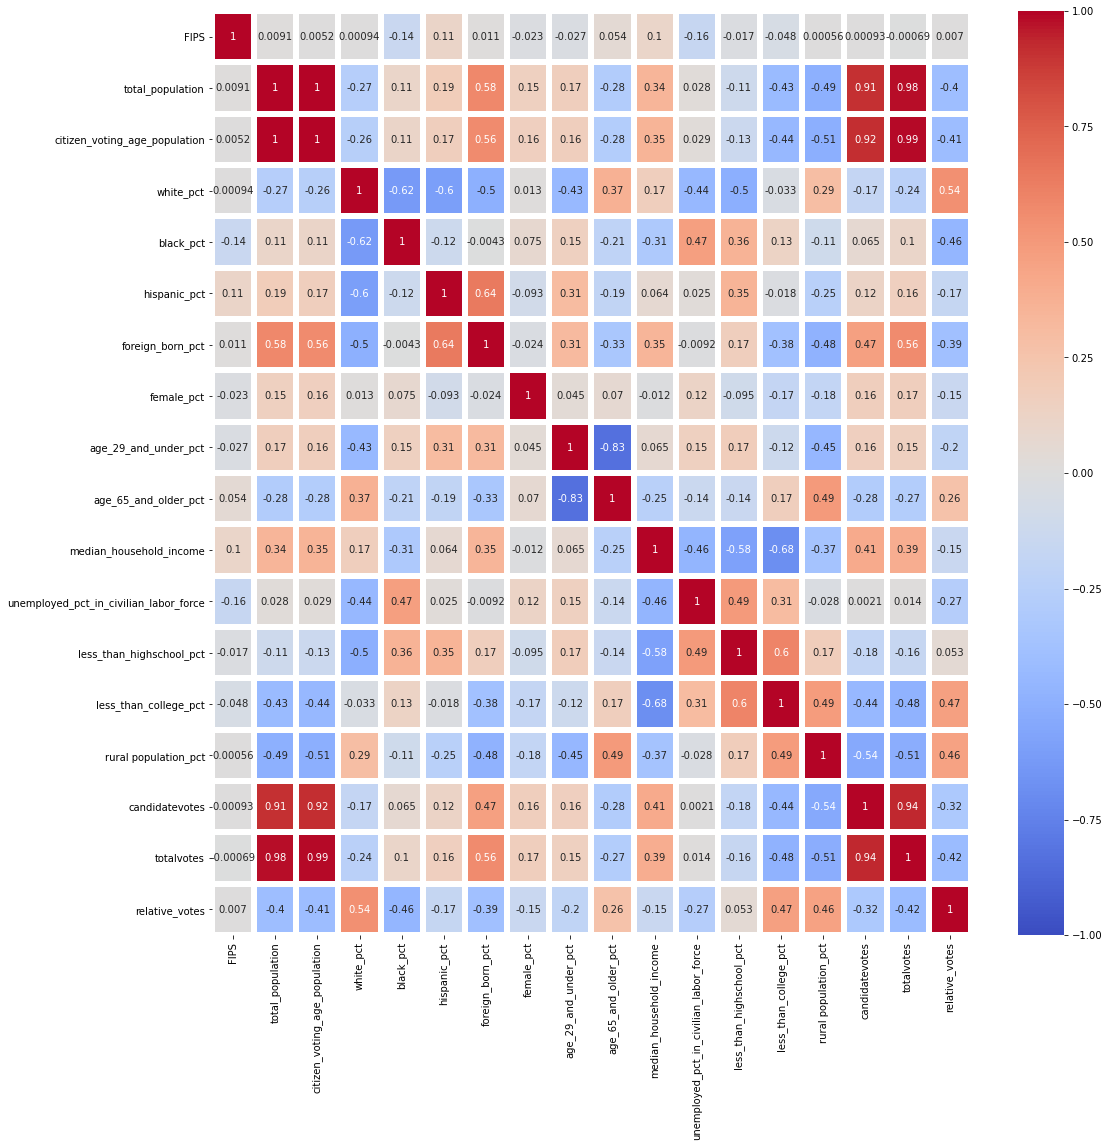

In [21]:
# To compute and take a look at the correlation between each of the columns.
corr = demo_votes2016_corr.corr()

# Creating and configuring the heatmap to visualize our data.
plt.figure(figsize=(17, 17))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, lw=5)
plt.show()

Looking at the above 2016 heatmap we have created, we can clearly see exactly which data columns are moderately or strongly correlated with the Republican vote share. What this means is that in this case, we are looking at the correlation between either the `candidate_votes` column (which can be used to find correlations with like values as it is a whole number and not a percentage) and/or we can also look at the `relative_votes` column (which can be used to find correlations with like values as it is a percentage and not a whole number) and whether any of the other columns have a value between `0.3 and 0.7` indicating a `moderate positive correlation` or a value between `0.7 and 1.0` indicating a `strong positive correlation`. 

**NOTE:** Both of these columns represent the Republican Vote Share.

#### Positive Correlation

The following is a list of the columns which are `moderately` correlated with the Republican share vote:

**`candidate_votes`**
- foreign_born_pct
- median_household_income

**`relative_votes`**
- white_pct
- less_than_college_pct
- rural population_pct

The following is a list of the columns which are `strongly` correlated with the Republican share vote:

- **`candidate_votes`**
- total_population
- citizen_voting_age_population
- total_votes

#### Weak Positive or Negative Correlation

The following is a list of the columns which are **NOT** moderately or strongly correlated with the Republican share vote (or in other words have a weak positive or overall negative correlation):

**`candidate_votes`**
- white_pct
- black_pct
- hispanic_pct
- female_pct
- age_29_and_under_pct
- and_65_and_older_pct
- unemployment_pct_in_civilian_labor_force
- less_than_highschool_pct
- less_than_college_pct
- rural population_pct
- relative_votes

**`relative_votes`**
- total_population (-0.31)
- citizen_voting_age_population (-0.31)
- black_pct
- hispanic_pct
- foreign_born_pct
- female_pct
- age_29_and_under_pct
- and_65_and_older_pct
- median_household_income
- unemployment_pct_in_civilian_labor_force
- less_than_highschool_pct
- candidate_votes
- total_votes

After consolidating this information and comparing the two elections, it appears that there is in fact a pattern in both elections. This can be seen through not only the moderate and strong correlations but also through the weak positive/overall negative correlations which appear to be the very similar across both 2012 and 2016. This may be an indicator of statistically signinifcance among the data discussed above.

-----------------------------------

### Q2

You are given the results of a poll of voting preferences for the 2016 US Election.
The sample size for the poll was 2,133. The sample was taken from eligible voters in the states of Florida and Pennsylvania.

Out of 1,042 respondents in Florida, approximately 46.84% would vote for the Democrats, and 45.22% for the Republicans
Out of 1,091 respondents in Pennsylvania, approximately 48.94% would be voting for the Democrats, and 41.2% for the Republicans
Run a hypothesis test to see whether voters' location is independent of their voting preference. Make sure to state your hypotheses and discuss your test result.

## Part 2 - Hypothesis Testing

Given the results of a poll of voting preferences for the 2016 US Election, we know that we have a sample size poll of 2,133 which was taken from eligible voters in the states of Florida and Pennsylvania. From this sample poll we know the following information:

- Out of 1,042 respondents in Florida, approximately 46.84% would vote for the Democrats, and 45.22% for the Republicans
- Out of 1,091 respondents in Pennsylvania, approximately 48.94% would be voting for the Democrats, and 41.2% for the Republicans

Based on this information, my hypothesis is that there is a statistically significant difference between the relative_votes for "Democrats" and "Republican" voters. Therefore if this statement is true, and voters' location is in fact inpedendent of their voting preference, then we can say that our null hypothesis is that there is no statistically significant difference between the relative_votes for "Democrats" and "Republican" voters. While our alternate hypothesis would be that there is a statistically significant difference between the relative_votes for "Democrats" and "Republican" voters, assuming level of significance <= 0.05.

This can be depicted using the following hypothesis:

<center> $H_0$: Democrat Relative Votes = Republican Retalive Votes $\;\; vs \;\;$  $H_1$: Democrat Relative Votes $\neq$ Republican Retalive Votes </center>

In [107]:
# Please run the code below to read in the following CSV data files. The CSV data file includes the presidential voting data for year 2016.

# Contains the number of votes for each major political party within each county for the 2016 elections.
votes2016_df = pd.read_csv('data/S_P_II_clean_presidential_2016_votes.csv')

To test this hypothesis, we can begin by selecting the appropriate data:

In [160]:
# To select just the rows where 'state' is Florida and `party` is democrat
florida_dem_votes = votes2016_df.loc[(votes2016_df['state'] == 'Florida') & (votes2016_df['party'] == 'democrat')]
florida_dem_votes

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
582,2016,Florida,Alachua,12001,Hillary Clinton,democrat,75820.0,128571,61.816166
584,2016,Florida,Baker,12003,Hillary Clinton,democrat,2112.0,12634,17.024021
586,2016,Florida,Bay,12005,Hillary Clinton,democrat,21797.0,87453,25.951590
588,2016,Florida,Bradford,12007,Hillary Clinton,democrat,2924.0,12098,24.702205
590,2016,Florida,Brevard,12009,Hillary Clinton,democrat,119679.0,314752,39.690973
...,...,...,...,...,...,...,...,...,...
706,2016,Florida,Union,12125,Hillary Clinton,democrat,1014.0,5694,18.165532
708,2016,Florida,Volusia,12127,Hillary Clinton,democrat,109091.0,260869,43.273251
710,2016,Florida,Wakulla,12129,Hillary Clinton,democrat,4348.0,15351,29.259758
712,2016,Florida,Walton,12131,Hillary Clinton,democrat,6876.0,33637,21.071341


In [161]:
# To select just the rows where 'state' is Florida and `party` is republican
florida_rep_votes = votes2016_df.loc[(votes2016_df['state'] == 'Florida') & (votes2016_df['party'] == 'republican')]
florida_rep_votes

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
583,2016,Florida,Alachua,12001,Donald Trump,republican,46834.0,128571,38.183834
585,2016,Florida,Baker,12003,Donald Trump,republican,10294.0,12634,82.975979
587,2016,Florida,Bay,12005,Donald Trump,republican,62194.0,87453,74.048410
589,2016,Florida,Bradford,12007,Donald Trump,republican,8913.0,12098,75.297795
591,2016,Florida,Brevard,12009,Donald Trump,republican,181848.0,314752,60.309027
...,...,...,...,...,...,...,...,...,...
707,2016,Florida,Union,12125,Donald Trump,republican,4568.0,5694,81.834468
709,2016,Florida,Volusia,12127,Donald Trump,republican,143007.0,260869,56.726749
711,2016,Florida,Wakulla,12129,Donald Trump,republican,10512.0,15351,70.740242
713,2016,Florida,Walton,12131,Donald Trump,republican,25756.0,33637,78.928659


In [162]:
# To select just the rows where 'state' is Pennsylvania and `party` is democrat
pennsylvania_dem_votes = votes2016_df.loc[(votes2016_df['state'] == 'Pennsylvania') & (votes2016_df['party'] == 'democrat')]
pennsylvania_dem_votes

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
4430,2016,Pennsylvania,Adams,42001,Hillary Clinton,democrat,14219.0,47489,31.153324
4432,2016,Pennsylvania,Allegheny,42003,Hillary Clinton,democrat,367617.0,650114,58.622031
4434,2016,Pennsylvania,Armstrong,42005,Hillary Clinton,democrat,7178.0,31618,23.410084
4436,2016,Pennsylvania,Beaver,42007,Hillary Clinton,democrat,32531.0,83571,40.312028
4438,2016,Pennsylvania,Bedford,42009,Hillary Clinton,democrat,3645.0,23637,15.713239
...,...,...,...,...,...,...,...,...,...
4554,2016,Pennsylvania,Washington,42125,Hillary Clinton,democrat,36322.0,101450,37.174029
4556,2016,Pennsylvania,Wayne,42127,Hillary Clinton,democrat,7008.0,24018,30.139343
4558,2016,Pennsylvania,Westmoreland,42129,Hillary Clinton,democrat,59669.0,182051,33.866089
4560,2016,Pennsylvania,Wyoming,42131,Hillary Clinton,democrat,3811.0,13144,30.131246


In [163]:
# To select just the rows where 'state' is Pennsylvania and `party` is republican
pennsylvania_rep_votes = votes2016_df.loc[(votes2016_df['state'] == 'Pennsylvania') & (votes2016_df['party'] == 'republican')]
pennsylvania_rep_votes

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
4431,2016,Pennsylvania,Adams,42001,Donald Trump,republican,31423.0,47489,68.846676
4433,2016,Pennsylvania,Allegheny,42003,Donald Trump,republican,259480.0,650114,41.377969
4435,2016,Pennsylvania,Armstrong,42005,Donald Trump,republican,23484.0,31618,76.589916
4437,2016,Pennsylvania,Beaver,42007,Donald Trump,republican,48167.0,83571,59.687972
4439,2016,Pennsylvania,Bedford,42009,Donald Trump,republican,19552.0,23637,84.286761
...,...,...,...,...,...,...,...,...,...
4555,2016,Pennsylvania,Washington,42125,Donald Trump,republican,61386.0,101450,62.825971
4557,2016,Pennsylvania,Wayne,42127,Donald Trump,republican,16244.0,24018,69.860657
4559,2016,Pennsylvania,Westmoreland,42129,Donald Trump,republican,116522.0,182051,66.133911
4561,2016,Pennsylvania,Wyoming,42131,Donald Trump,republican,8837.0,13144,69.868754


In [164]:
# We can use the built in function 'ttest_ind' to find our p-value
two_sample_test = stats.ttest_ind(florida_dem_votes['relative_votes'], florida_rep_votes['relative_votes'])
print(two_sample_test)

Ttest_indResult(statistic=-11.425878955899675, pvalue=1.9016810502382267e-21)


As mentioned before, assuming level of significance <= 0.05, the p-value for Florida is 1.901681e-21 which is far less than 0.05. Hence we can reject the null hypothesis. Therefore if we reject the null hypothesis, there is statistically significant difference between the relative_votes for "Democrats" and "Republican" voters. 

In [171]:
# We can use the built in function 'ttest_ind' to find our p-value
two_sample_test = stats.ttest_ind(pennsylvania_dem_votes['relative_votes'], pennsylvania_rep_votes['relative_votes'])
print(two_sample_test)

Ttest_indResult(statistic=-14.108123125986918, pvalue=3.9356819111246623e-28)


Similarly, the p-value for Pennsylvania is 3.9356819111246623e-28 which is far less than 0.05. Hence we can reject the null hypothesis. Therefore if we reject the null hypothesis, there is statistically significant difference between the relative_votes for "Democrats" and "Republican" voters. 

### Part 3 - Predicting 2016 Relative Vote Share

In [ ]:
Before we begin our predictive modeling, please run the following cells to make sure everything runs smoothly:

In [179]:
# Please run the code below to read in the following CSV data files. The CSV data files include the demographic and presidential voting data for years 2012 and 2016.

# Contains various census statistics for each county; these include things like the racial makeup of the population or the overall economic status.
demographic_df = pd.read_csv('data/S_P_II_clean_demographic_data.csv')

# Contains the number of votes for each major political party within each county for the 2016 elections.
votes2016_df = pd.read_csv('data/S_P_II_clean_presidential_2016_votes.csv')

In [180]:
# Removing any/all rows with missing values.
demographic_df = demographic_df.dropna()

# Check
demographic_df.isna().sum()

state                                     0
county                                    0
FIPS                                      0
total_population                          0
citizen_voting_age_population             0
white_pct                                 0
black_pct                                 0
hispanic_pct                              0
foreign_born_pct                          0
female_pct                                0
age_29_and_under_pct                      0
age_65_and_older_pct                      0
median_household_income                   0
unemployed_pct_in_civilian_labor_force    0
less_than_highschool_pct                  0
less_than_college_pct                     0
rural population_pct                      0
dtype: int64

In [181]:
# Selecting just the rows and columns with regards to Republicans.
republican_votes = votes2016_df.loc[votes2016_df['party'] == 'republican']
republican_votes

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
1,2016,Alabama,Autauga,1001,Donald Trump,republican,18172.0,24973,75.377468
3,2016,Alabama,Baldwin,1003,Donald Trump,republican,72883.0,95215,79.792207
5,2016,Alabama,Barbour,1005,Donald Trump,republican,5454.0,10469,52.823245
7,2016,Alabama,Bibb,1007,Donald Trump,republican,6738.0,8819,78.239666
9,2016,Alabama,Blount,1009,Donald Trump,republican,22859.0,25588,91.381171
...,...,...,...,...,...,...,...,...,...
6299,2016,Alaska,District 37,2037,Donald Trump,republican,1938.0,5062,44.459738
6301,2016,Alaska,District 38,2038,Donald Trump,republican,1143.0,5095,29.300179
6303,2016,Alaska,District 39,2039,Donald Trump,republican,1405.0,5639,30.899494
6305,2016,Alaska,District 40,2040,Donald Trump,republican,1377.0,4610,37.065949


In [182]:
# Dropping the 'state' and 'county' columns for 2012 votes data.
republican_votes = republican_votes.drop(['state', 'county'], axis=1)
republican_votes

,year,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
1,2016,1001,Donald Trump,republican,18172.0,24973,75.377468
3,2016,1003,Donald Trump,republican,72883.0,95215,79.792207
5,2016,1005,Donald Trump,republican,5454.0,10469,52.823245
7,2016,1007,Donald Trump,republican,6738.0,8819,78.239666
9,2016,1009,Donald Trump,republican,22859.0,25588,91.381171
...,...,...,...,...,...,...,...
6299,2016,2037,Donald Trump,republican,1938.0,5062,44.459738
6301,2016,2038,Donald Trump,republican,1143.0,5095,29.300179
6303,2016,2039,Donald Trump,republican,1405.0,5639,30.899494
6305,2016,2040,Donald Trump,republican,1377.0,4610,37.065949


In [183]:
# Inner Joining the demographic data with the 2016 votes data.
demo_rep_votes2016_merged = pd.merge(demographic_df, republican_votes, on='FIPS')
demo_rep_votes2016_merged

,state,county,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,...,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,year,candidate,party,candidatevotes,totalvotes,relative_votes
0,Alabama,Chambers,1017,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,...,7.489945,19.736732,87.515721,49.148034,2016,Donald Trump,republican,7843.0,13900,57.554854
1,Alabama,Cherokee,1019,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,...,5.855731,18.717235,86.038301,85.736273,2016,Donald Trump,republican,8953.0,10733,85.266667
2,Alabama,Clarke,1025,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,...,17.083333,18.957819,87.862766,75.980335,2016,Donald Trump,republican,7140.0,13031,55.396074
3,Alabama,Clay,1027,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,...,6.591530,25.386407,88.937116,100.000000,2016,Donald Trump,republican,5245.0,6624,80.916384
4,Alabama,Cleburne,1029,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,...,7.173601,25.815165,88.471927,100.000000,2016,Donald Trump,republican,5764.0,6593,89.392060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Wyoming,Converse,56009,14223.0,10550.0,88.849047,0.007031,7.691767,2.706883,49.933207,...,5.282284,9.758393,84.468152,55.360370,2016,Donald Trump,republican,5520.0,6654,89.204913
929,Wyoming,Fremont,56013,40683.0,30170.0,70.198855,0.516186,6.779244,1.339626,49.907824,...,7.344324,8.537172,77.648670,51.424370,2016,Donald Trump,republican,11167.0,17023,72.668706
930,Wyoming,Park,56029,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,...,3.786077,5.748368,67.998625,44.240383,2016,Donald Trump,republican,11115.0,15095,81.428571
931,Wyoming,Sublette,56035,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,...,2.786971,4.658830,75.645069,100.000000,2016,Donald Trump,republican,3409.0,4390,84.110535


Now that we have the data set up accordingly, we can proceed with setting up our independent variables and dependent variable. Our variables are as follows:

##### Independent(X) Variables
- total_population
- citizen_voting_age_population
- white_pct
- black_pct
- hispanic_pct
- foreign_born_pct
- female_pct
- age_29_and_under_pct
- age_65_and_older_pct
- median_household_income
- unemployed_pct_in_civilian_labor_force
- less_than_highschool_pct
- less_than_college_pct
- rural population_pct
- candidatevotes
- totalvotes

##### Dependent(y) Variable

- relative_votes

In [196]:
#The independent variables
X = demo_rep_votes2016_merged[['total_population','citizen_voting_age_population', 'white_pct','black_pct', 'hispanic_pct','foreign_born_pct', 'female_pct','age_29_and_under_pct', 'age_65_and_older_pct', 'median_household_income', 
                              'unemployed_pct_in_civilian_labor_force', 'less_than_highschool_pct', 'less_than_college_pct', 'rural population_pct', 'candidatevotes', 'totalvotes']]

#The dependent variable
y = demo_rep_votes2016_merged['relative_votes']

In [197]:
# We need to manually add an intercept
X_const = sm.add_constant(X)

In [198]:
# 1. Instatiate the model
my_bp_model = sm.OLS(y, X_const)

# 2. Fit the model
fitted_bp_model = my_bp_model.fit()

# 3. Looat at the summary / coefficients / p-values
fitted_bp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          1.40e-201
Time:                        23:39:13   Log-Likelihood:                -3399.4
No. Observations:                 933   AIC:                             6833.
Df Residuals:                     916   BIC:                             6915.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -69.6484     13.103     -5.316      0.000     -95.363     -43.933
total_population                        3.397e-05   1.97e-05      1.726      0.085   -4.65e-06    7.26e-05
citizen_voting_age_population          -5.244e-05    3.6e-05     -1.458      0.145      -0.000    1.81e-05
white_pct                                  0.3842      0.044      8.716      0.000       0.298       0.471
black_pct                                 -0.1326      0.046     -2.899      0.004      -0.222      -0.043
hispanic_pct                               0.0591      0.051      1.159      0.247      -0.041       0.159
foreign_born_pct                          -0.0998      0.119     -0.836      0.404      -0.334       0.135
female_pct                                -0.1476      0.161     -0.918      0.359      -0.463       0.168
age_29_and_under_pct                       0.7632      0.125      6.121      0.000       0.519       1.008
age_65_and_older_pct                       0.6177      0.162      3.801      0.000       0.299       0.937
median_household_income                    0.0002   4.76e-05      3.876      0.000     9.1e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8424      0.129     -6.509      0.000      -1.096      -0.588
less_than_highschool_pct                   0.4557      0.090      5.081      0.000       0.280       0.632
less_than_college_pct                      0.7686      0.061     12.587      0.000       0.649       0.888
rural population_pct                       0.0758      0.015      4.971      0.000       0.046       0.106
candidatevotes                             0.0002   2.81e-05      7.063      0.000       0.000       0.000
totalvotes                              -7.11e-05   3.02e-05     -2.351      0.019      -0.000   -1.18e-05
==============================================================================
Omnibus:                       35.015   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.086
Skew:                          -0.432   Prob(JB):                     1.97e-09
Kurtosis:                       3.533   Cond. No.                     1.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The following variables are most positively predictive:

- total_population
- white_pct
- black_pct
- age_29_and_under_pct
- age_65_and_older_pct
- median_household_income
- unemployed_pct_in_civilian_labor_force
- less_than_highschool_pct
- less_than_college_pct
- rural population_pct
- candidatevotes
- totalvotes

The following variables are negatively predictive:

- citizen_voting_age_population
- hispanic_pct
- foreign_born_pct
- female_pct
